# Interval on ratio of binomials (frequentist approach)

- In an antineutrino-nucleon scattering experiment with the Gargamelle bubble chamber at CERN, events were selected having only hadrons (from the neutral-current process $\nu_\mu N \to \nu_\mu X$) or with hadrons and a muon (the charged-current process $\nu_\mu N \to \mu^+ X$)
- Out of a sample of 212 events, 64 were classified as neutral current (NC) and 148 as charged current (CC)
- Theory predict $\frac{\sigma_{NC}}{\sigma_{CC}}$, what is its measurement and its interval with confidence level of 68.3%?
- $\sigma = \mathcal{L} N / \varepsilon$, where $\varepsilon$ is the experimental efficiency. Assuming the efficiency is the same for NC and CC events, then $\frac{\sigma_{NC}}{\sigma_{CC}} = \frac{N^{obs}_{NC}}{N^{obs}_{CC}}$. The measurement of $\frac{\sigma_{NC}}{\sigma_{CC}}$, and its uncertainty, is experimentally accessible trough the quantity $\frac{N^{obs}_{NC}}{N^{obs}_{CC}}$.

## Binomial distribution

- Distribution of $N_{NC/CC)}$ is a binomial $\mathcal{B}(N, p))$ with total number $N = 212$ and probability $p = \frac{N_{NC/CC}}{N}$

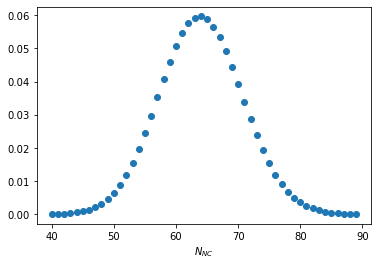

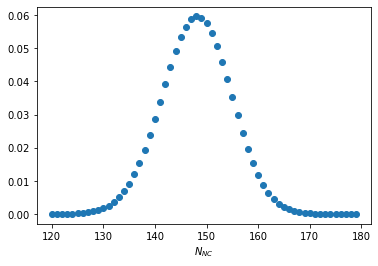

In [23]:
from scipy.stats import binom
from matplotlib import pyplot as plt
import numpy as np

nc_obs = 64
n = 212
cc_obs = n-nc_obs

nc_vals = np.arange(40,90)
plt.figure()
plt.xlabel('$N_{NC}$')
plt.plot(nc_vals,binom(n=n,p=nc_obs/n).pmf(nc_vals),'o')

cc_vals = np.arange(120,180)
plt.figure()
plt.xlabel('$N_{NC}$')
plt.plot(cc_vals,binom(n=n,p=cc_obs/n).pmf(cc_vals),'o')

## Upper limit and lower limit on the observed yields

- Interval $[N_{x}^{low},N_{x}^{up}]$, with $x=NC,CC$, at confidence level $CL = 1-\alpha-\beta$ is determined with a frequentist approach
    - Upper limit:
        \begin{equation}
        \sum_{n=0}^{N^{obs}_{x}} \mathcal{B}\left(n \,\big\vert\, N,\frac{N^{up}_{x}}{N}\right) = \beta
        \end{equation}
    - Lower limit:
        \begin{equation}
        \sum_{n=N^{obs}_{x}}^{N} \mathcal{B}\left(n \,\big\vert\, N,\frac{N^{low}_{x}}{N}\right) = \alpha
        \end{equation}
- In this example we choose $CL = 68.3\% \;(1 \sigma)$ and a central interval $\alpha=\beta=0.15865$ 

#CC: 148 +6.96 -7.38
#NC: 64 +7.38 -6.96


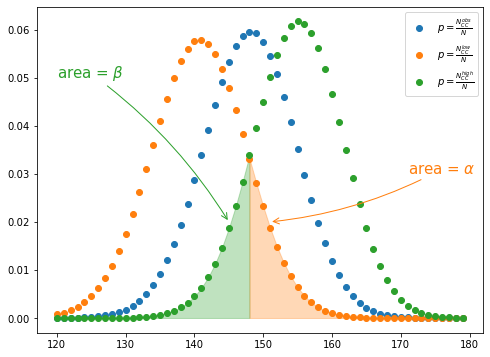

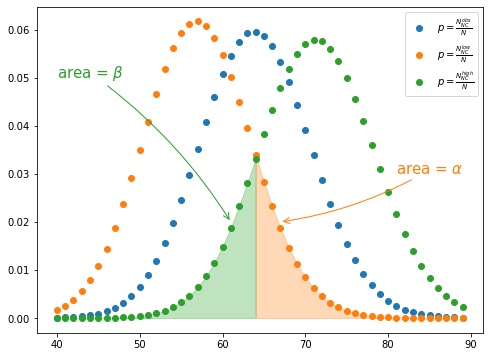

In [62]:
from scipy.stats import norm
from scipy.optimize import root_scalar
alpha = norm.cdf(-1)
beta = alpha

for nx_obs,label,vals in zip([cc_obs,nc_obs],['CC','NC'],[cc_vals,nc_vals]):
    # upper limit
    phigh = root_scalar( lambda x: binom(n=n,p=x).cdf(nx_obs)-beta, bracket = [0,1], method='toms748').root
    nx_high = n*phigh
    # lower limit
    plow = root_scalar( lambda x: binom(n=n,p=x).sf(nx_obs)+binom(n=n,p=x).pmf(nx_obs)-alpha, bracket = [0,1], method='toms748').root
    nx_low = n*plow
    print('#{label}: {nobs} +{nhigherr:.2f} -{nlowerr:.2f}'.format(label=label,nobs=nx_obs,nhigherr=nx_high-nx_obs,nlowerr=nx_obs-nx_low))
    plt.figure(figsize=(8,6))
    plt.plot(vals,binom(n=n,p=nx_obs/n).pmf(vals),'o',label=r'$p = \frac{N^{obs}_{'+label+'}}{N}$',)
    curvelow = plt.plot(vals,binom(n=n,p=plow).pmf(vals),'o',label=r'$p = \frac{N^{low}_{'+label+'}}{N}$')
    curvehigh = plt.plot(vals,binom(n=n,p=phigh).pmf(vals),'o',label=r'$p = \frac{N^{high}_{'+label+'}}{N}$')
    x = np.arange(np.min(vals),nx_obs+1)
    plt.fill_between(x = x,y1 = np.zeros(x.shape),y2 = binom(n=n,p=phigh).pmf(x),color=curvehigh[0].get_color(),alpha=0.3)
    plt.annotate(r'area = $\beta$',fontsize=15,color=curvehigh[0].get_color(),xy = (nx_obs-3,0.02),xytext=(np.min(vals),0.05),arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.1", color=curvehigh[0].get_color()))
    x = np.arange(nx_obs,np.max(vals))
    plt.fill_between(x = x,y1 = np.zeros(x.shape),y2 = binom(n=n,p=plow).pmf(x),color=curvelow[0].get_color(),alpha=0.3)
    plt.annotate(r'area = $\alpha$',fontsize=15,color=curvelow[0].get_color(),xy = (nx_obs+3,0.02),xytext=(np.max(vals)-8,0.03),arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.1", color=curvelow[0].get_color()))
    plt.legend(loc='best')

## Confidence interval on the ratio of observed yields

- Since the ratio $\frac{N_{NC}}{N_{CC}} = \frac{N_{NC}}{N-N_{NC}}$ is a monotonic function of $N_{NC}$, constraints on $N_{NC}$ translates into constraints on the ratio $\frac{N_{NC}}{N_{CC}}$

In [67]:
ratio_obs = nx_obs/(n-nx_obs)
ratio_high = nx_high/(n-nx_high)
ratio_low = nx_low/(n-nx_low)
print('N_{NC}/N_{CC} = %f +%f -%f'%(ratio_obs,ratio_high-ratio_obs,ratio_obs-ratio_low))

N_{NC}/N_{CC} = 0.432432 +0.075180 -0.064300


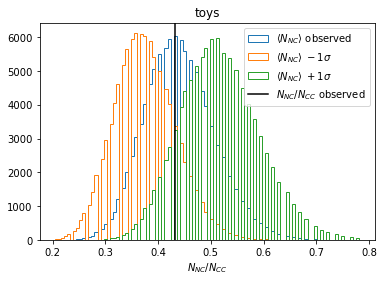

In [90]:
ntoys = 100000
nc_random = binom(n=212,p=nx_obs/n).rvs(size=ntoys)
nc_random_high = binom(n=212,p=nx_high/n).rvs(size=ntoys)
nc_random_low = binom(n=212,p=nx_low/n).rvs(size=ntoys)
_,bins,_=plt.hist(nc_random/(n-nc_random),bins=100,label=r'$\langle N_{NC}\rangle$ observed',histtype='step')
_=plt.hist(nc_random_low/(n-nc_random_low),bins=bins,label=r'$\langle N_{NC}\rangle\; -1\sigma$',histtype='step')
_=plt.hist(nc_random_high/(n-nc_random_high),bins=bins,label=r'$\langle N_{NC}\rangle\; +1\sigma$',histtype='step')
plt.axvline(nx_obs/(n-nx_obs),color='black',label='$N_{NC}/N_{CC}$ observed')
plt.title('toys')
plt.xlabel('$N_{NC}/N_{CC}$')
plt.legend(loc='best')